<a href="https://colab.research.google.com/github/Jasleen8801/text_mining/blob/main/Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow_datasets as tfds

# Load the IMDB dataset
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']


In [4]:
import pandas as pd

train_df = pd.DataFrame([(str(text.numpy()), label.numpy()) for text, label in train_data], columns=['review', 'sentiment'])
test_df = pd.DataFrame([(str(text.numpy()), label.numpy()) for text, label in test_data], columns=['review', 'sentiment'])

train_df.head()


,review,sentiment
0,"b""This was an absolutely terrible movie. Don't...",0
1,b'I have been known to fall asleep during film...,0
2,b'Mann photographs the Alberta Rocky Mountains...,0
3,b'This is the kind of film for a snowy Sunday ...,1
4,"b'As others have mentioned, all the women that...",1


<Axes: title={'center': 'Sentiment Distribution in Training Data'}, xlabel='sentiment'>

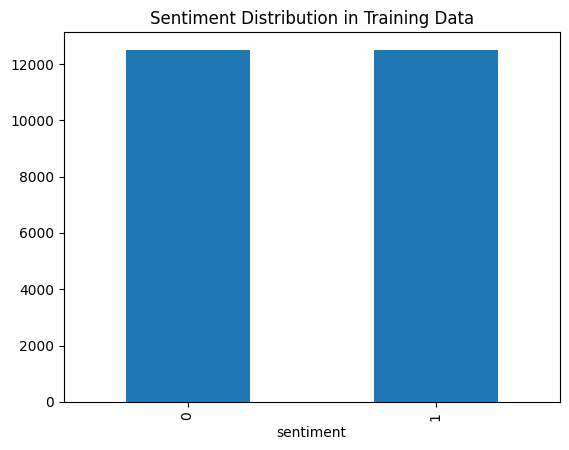

In [4]:
train_df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution in Training Data')

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

train_df['review_processed'] = train_df['review'].apply(lambda x: word_tokenize(x.lower()))
test_df['review_processed'] = test_df['review'].apply(lambda x: word_tokenize(x.lower()))
train_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment,review_processed
0,"b""This was an absolutely terrible movie. Don't...",0,"[b, '', this, was, an, absolutely, terrible, m..."
1,b'I have been known to fall asleep during film...,0,"[b, ', i, have, been, known, to, fall, asleep,..."
2,b'Mann photographs the Alberta Rocky Mountains...,0,"[b'mann, photographs, the, alberta, rocky, mou..."
3,b'This is the kind of film for a snowy Sunday ...,1,"[b'this, is, the, kind, of, film, for, a, snow..."
4,"b'As others have mentioned, all the women that...",1,"[b'as, others, have, mentioned, ,, all, the, w..."


In [6]:
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    return [word for word in text if word not in stop_words and word not in string.punctuation]

train_df['review_processed'] = train_df['review_processed'].apply(preprocess)
test_df['review_processed'] = test_df['review_processed'].apply(preprocess)
train_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,review_processed
0,"b""This was an absolutely terrible movie. Don't...",0,"[b, '', absolutely, terrible, movie, n't, lure..."
1,b'I have been known to fall asleep during film...,0,"[b, known, fall, asleep, films, usually, due, ..."
2,b'Mann photographs the Alberta Rocky Mountains...,0,"[b'mann, photographs, alberta, rocky, mountain..."
3,b'This is the kind of film for a snowy Sunday ...,1,"[b'this, kind, film, snowy, sunday, afternoon,..."
4,"b'As others have mentioned, all the women that...",1,"[b'as, others, mentioned, women, go, nude, fil..."


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorization
# vectorizer = TfidfVectorizer(max_features=10000, preprocessor=lambda x: ' '.join(x))
vectorizer = CountVectorizer(max_features=10000, preprocessor=lambda x: ' '.join(x))

X_train = vectorizer.fit_transform(train_df['review_processed'])
X_test = vectorizer.transform(test_df['review_processed'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']

In [9]:
# Print X_train for TfidVectorizer
print(X_train)

  (0, 8133)	0.11246886428409178
  (0, 845)	0.12218591554045734
  (0, 5979)	0.09502615618327956
  (0, 3934)	0.04774333734305025
  (0, 236)	0.08652078877606356
  (0, 7619)	0.17590545577337183
  (0, 5258)	0.08611895549568463
  (0, 5911)	0.0620988163652622
  (0, 2649)	0.10686338483186587
  (0, 5631)	0.12288836079260312
  (0, 7172)	0.07104165761974367
  (0, 2579)	0.1584840784172735
  (0, 6697)	0.1806523405191578
  (0, 3025)	0.11633929951791153
  (0, 6139)	0.07295590171508909
  (0, 306)	0.13123560668937195
  (0, 5389)	0.06653265512618696
  (0, 6990)	0.15667222621392793
  (0, 6598)	0.16489857414343506
  (0, 564)	0.12881440664925395
  (0, 5528)	0.1620189183322077
  (0, 1474)	0.1484147134409681
  (0, 5484)	0.08016543344062324
  (0, 7199)	0.18309926261991052
  (0, 7748)	0.06974817429805975
  :	:
  (24999, 8550)	0.13315847124919722
  (24999, 4793)	0.18440025904718083
  (24999, 9959)	0.04450697362781593
  (24999, 3519)	0.07178329912706279
  (24999, 2635)	0.04492580809430374
  (24999, 5479)	0.10976

In [13]:
# Print X_train for TfidVectorizer
print(X_train)

  (0, 175)	1
  (0, 8923)	1
  (0, 5910)	4
  (0, 1682)	2
  (0, 9627)	3
  (0, 5715)	1
  (0, 3992)	2
  (0, 237)	1
  (0, 5952)	1
  (0, 8106)	1
  (0, 9895)	1
  (0, 7557)	1
  (0, 4303)	1
  (0, 3170)	1
  (0, 230)	1
  (0, 2124)	2
  (0, 7229)	1
  (0, 7488)	1
  (0, 8551)	1
  (0, 2907)	1
  (0, 6089)	1
  (0, 9441)	1
  (0, 6955)	1
  (0, 6624)	1
  (0, 6484)	2
  :	:
  (24999, 2812)	1
  (24999, 8499)	1
  (24999, 757)	1
  (24999, 2274)	1
  (24999, 6890)	1
  (24999, 1937)	1
  (24999, 2724)	1
  (24999, 446)	1
  (24999, 4485)	1
  (24999, 7021)	2
  (24999, 4250)	1
  (24999, 6989)	1
  (24999, 2605)	1
  (24999, 6446)	1
  (24999, 3509)	1
  (24999, 5116)	2
  (24999, 2738)	1
  (24999, 126)	1
  (24999, 8044)	1
  (24999, 8273)	1
  (24999, 8680)	1
  (24999, 127)	1
  (24999, 9334)	1
  (24999, 6778)	1
  (24999, 8266)	1


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy: {accuracy:.2f}')

Naive Bayes Accuracy: 0.84
Logistic Regression Accuracy: 0.85
SVM Accuracy: 0.87
Random Forest Accuracy: 0.84
KNN Accuracy: 0.59


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'\n{name} Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print(f'\n{name} Classification Report:\n', classification_report(y_test, y_pred))



Naive Bayes Confusion Matrix:
 [[10952  1548]
 [ 2571  9929]]

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84     12500
           1       0.87      0.79      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.83     25000
weighted avg       0.84      0.84      0.83     25000


Logistic Regression Confusion Matrix:
 [[10732  1768]
 [ 1971 10529]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000


SVM Confusion Matrix:
 [[10610  1890]
 [ 1455 11045]]

SVM Classification Report:
               precision    recall  f1-score   

In [17]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')


Naive Bayes Cross-Validation Accuracy: 0.85 (+/- 0.03)
Logistic Regression Cross-Validation Accuracy: 0.87 (+/- 0.01)
SVM Cross-Validation Accuracy: 0.87 (+/- 0.02)
Random Forest Cross-Validation Accuracy: 0.84 (+/- 0.02)
KNN Cross-Validation Accuracy: 0.60 (+/- 0.02)


How does lemmatization impact the accuracy of the classifiers?

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
  return [lemmatizer.lemmatize(word) for word in text]

train_df['review_processed'] = train_df['review_processed'].apply(lemmatize)
test_df['review_processed'] = test_df['review_processed'].apply(lemmatize)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, preprocessor=lambda x: ' '.join(x))

X_train = vectorizer.fit_transform(train_df['review_processed'])
X_test = vectorizer.transform(test_df['review_processed'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy: {accuracy:.2f}')

[nltk_data] Downloading package wordnet to /root/nltk_data...


Naive Bayes Accuracy: 0.84
Logistic Regression Accuracy: 0.88


Implement a different vectorization technique, such as Word2Vec or GloVe embeddings. How does the change in vectorization method impact the performance of the classification models?

In [19]:
!pip install glove-python3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.0/327.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for glove-python3: filename=glove_python3-0.1.0-cp310-cp310-linux_x86_64.whl size=1065518 sha256=ef5d364bae7f4a23bb652f912cc9bcdddedee818e5a0d7109a31f1f8c51af994
  Stored in directory: /root/.cache/pip/wheels/fe/2f/79/34314d44a0907e90e323c8c182ec23f126eb460829e02d98cf
Successfully built glove-python3


In [21]:
from glove import Glove, Corpus

corpus = Corpus()
corpus.fit(train_df['review_processed'], window=5)

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

word_vectors = glove.word_vectors
word_vectors.shape

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


(113238, 100)

In [24]:
X_train = vectorizer.fit_transform(train_df['review_processed'])
X_test = vectorizer.transform(test_df['review_processed'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy: {accuracy:.2f}')

Naive Bayes Accuracy: 0.84
Logistic Regression Accuracy: 0.88


3. Tune the hyperparameters for the SVM classifier using GridSearchCV or RandomizedSearchCV. What combination of hyperparameters yields the best performance, and why do you think this combination is optimal?

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

svm = SVC()

grid = GridSearchCV(svm, param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 8.2min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 7.0min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 8.3min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 6.8min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 8.1min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 6.9min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 6.9min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 6.9min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 6.9min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 6.9min


4. Combine the classifiers using a Voting Classifier (ensemble method). Does the ensemble model outperform the individual classifiers in terms of accuracy and other performance metrics? Why might the ensemble model perform better or worse than the individual models?*italicized text*

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

log_clf = LogisticRegression()
nb_clf = MultinomialNB()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('nb', nb_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

print(voting_clf.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
